In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [52]:
import numpy as np
import pandas as pd

In [53]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [55]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [56]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [57]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [60]:
inspector = inspect(engine)

In [61]:
inspector.get_table_names()

['measurement', 'station']

In [62]:
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-01-01', '2016-12-31'))


In [63]:
prcp_df = pd.DataFrame(prcp_data[:], columns=['date', 'prcp'])

In [64]:
prcp_df.set_index('date', inplace=True, )

C:\Users\pvcousin\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


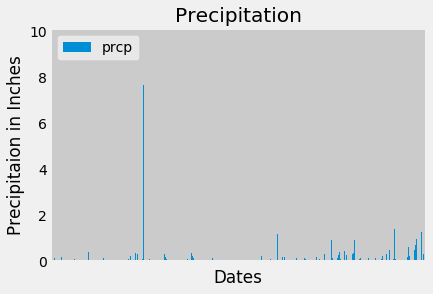

In [65]:
subplot = prcp_df.plot(kind='bar')
ax = subplot.axes
ax.set_title("Precipitation")
ax.set_xlabel("Dates")
ax.set_ylabel("Precipitaion in Inches")
ax.set_xticklabels([])   
f = ax.get_figure()
f.show()

# Exploratory Climate Analysis

In [66]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [67]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(prcp_df.describe())

              prcp
count  2069.000000
mean      0.179845
std       0.506363
min       0.000000
25%       0.000000
50%       0.020000
75%       0.150000
max       9.640000


![describe](Images/describe.png)

In [68]:
# Design a query to show how many stations are available in this dataset?
session.query(Station).count()

9

In [69]:
data = pd.read_sql("SELECT * FROM Measurement", conn)

In [72]:
data.columns

Index(['id', 'station', 'date', 'prcp', 'tobs'], dtype='object')

In [80]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = pd.read_sql("Select * FROM Measurement WHERE Measurement.prcp > 0", conn)
active_stations.head(5)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,6,USC00519397,2010-01-07,0.06,70.0
2,10,USC00519397,2010-01-11,0.01,64.0
3,22,USC00519397,2010-01-24,0.01,71.0
4,24,USC00519397,2010-01-26,0.04,76.0


In [107]:
active_stations = active_stations.loc[:,['station','prcp']]

active_stations_gb = active_stations.groupby('station').count()

stations = active_stations_gb.sort_values(['prcp'], ascending = False)

stations

,prcp
station,
USC00519281,1973
USC00516128,1937
USC00513117,1765
USC00519523,1191
USC00514830,1114
USC00519397,919
USC00511918,534
USC00518838,256
USC00517948,229


In [133]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = session.query(Measurement).filter_by(station = 'USC00519281').all()

most_active_df = pd.DataFrame(most_active[:])

print(prcp_df.describe())

              prcp
count  2069.000000
mean      0.179845
std       0.506363
min       0.000000
25%       0.000000
50%       0.020000
75%       0.150000
max       9.640000


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [89]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [91]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_data = print(calc_temps('2016-01-01', '2016-01-06'))

[(62.0, 70.0, 76.0)]


In [129]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
